In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [14]:
#default값 설정
plt.rcParams['figure.figsize'] = [10, 10] 
sns.set(style='darkgrid')
plt.rcParams['scatter.edgecolors'] = 'black'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
pd.set_option('display.unicode.east_asian_width', True)

In [ ]:
#샘플데이터 로드
iris_dataset = load_iris()
iris = pd.DataFrame(iris_dataset.data,
        columns=iris_dataset.feature_names)
labels = iris_dataset.target_names
iris.info()
print(iris.head())

In [ ]:
print(iris_dataset.keys())
print(iris_dataset.target_names) 
print(iris_dataset.feature_names)

In [ ]:
labels

In [ ]:
#target(정답) 
label = iris_dataset.target
print(label)

In [ ]:
print(type(iris))

In [ ]:
scaler = StandardScaler()  #평균0, 표준편차1 정규분포로 표준화
iris = scaler.fit_transform(iris)
print(type(iris))
Features = pd.DataFrame(iris, columns=['SL','SW','PL','PW'])  #스케일을 하면 데이터 타입이 numpy.ndarray로 바뀌게됨, 다시 df로 바꿔줘야함
print(Features.shape) #150개 자료 컬럼은 4개

In [ ]:
#학습과 test를 위한 data분할
X_train, X_test, Y_train, Y_test = train_test_split(
    Features, label, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [23]:
#K-최근접 이웃 알고리즘, 단순한 데이터를 대상으로 분류나 회귀를 할 때 사용
#n_neighbors의 값에 따라 accuracy_rate이 달라지기 때문에 최적의 n_nighbors를 찾아야함
accuracy_rate = []
error_rate = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, Features, label, cv=17)  #Features를 knn모델로 분류, cross validation 교차검정..  데이터를 20등분 19개로 결정분계.. 
    accuracy_rate.append(score.mean())
    error_rate.append(1-score.mean())

In [24]:
#cross_val_score(모델 명, 훈련데이터, 타깃, cv(=fold수, default는3)) : 단순교차검증
#데이터를 부분집합으로 분할 후 각 분할마다 하나의 폴드를 테스트용으로 사용하고 나머지 폴드는 훈련용, 이 과정을 반복하여 각 분할마다 정확도를 측정

#다만 데이터가 편향되어 있을 경우(몰려있는)에는 stratified k-fold cross-validation(계층별 k-겹 교차검증)을 사용
#StratifiedKFold(n_splits, shuffle, random_state),  cross_val_score의 cv에 이 StratifiedKFold를 넣어주면 됨

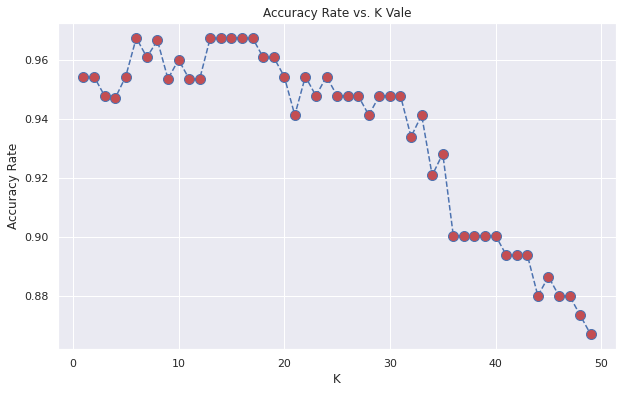

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50), accuracy_rate, color='b',
         linestyle='dashed', marker='o',
         markerfacecolor='r', markersize=10)
plt.title('Accuracy Rate vs. K Vale')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

In [26]:
print(max(accuracy_rate))

0.9673202614379084


In [27]:
model_predict_error_rate = []
for i in range(1, 50):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, Y_train)
  pred_i = knn.predict(X_test)
  model_predict_error_rate.append(np.mean(pred_i != Y_test))

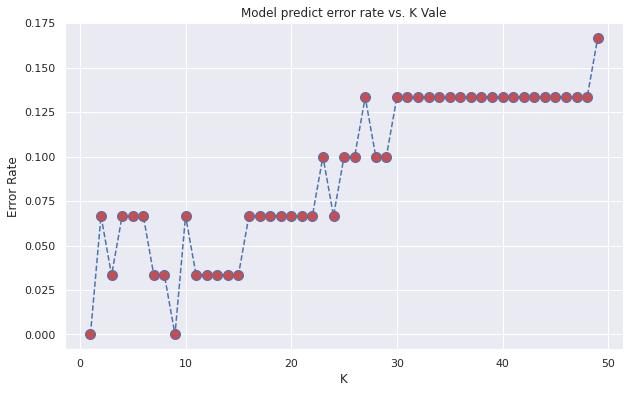

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50), model_predict_error_rate, color='b',
         linestyle='dashed', marker='o',
         markerfacecolor='r', markersize=10)
plt.title('Model predict error rate vs. K Vale')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
for i in range(1,1000):
  X_train, X_test, Y_train, Y_test = train_test_split(
      Features, label, test_size=0.2, random_state=i)
  IrisKNN = KNeighborsClassifier(n_neighbors=6)
  IrisKNN.fit(X_train, Y_train) #학습 시켜서
  train_score = IrisKNN.score(X_train, Y_train)
  test_score = IrisKNN.score(X_test, Y_test)
  if test_score > train_score:
    print('Test:{} Train:{} RandomState:{}'.format(test_score, train_score, i))

#test_data는 양이 적어서 정확도가 높게 나옴,  i 가 960일때 가장 accuracy가 높았음, 

In [30]:
#for문으로 확인한 최적의 random_state와 n_neighbors 
X_train, X_test, Y_train, Y_test = train_test_split(
      Features, label, test_size=0.2, random_state=960)
IrisKNN = KNeighborsClassifier(n_neighbors=6)
IrisKNN.fit(X_train, Y_train) #학습 시켜서
train_score = IrisKNN.score(X_train, Y_train)
print(train_score)
test_score = IrisKNN.score(X_test, Y_test)
print(test_score)


0.975
1.0


In [41]:
#for문으로 확인한 최적의 random_state와 n_neighbors 
X_train, X_test, Y_train, Y_test = train_test_split(
      Features, label, test_size=0.2, random_state=960)
IrisKNN = KNeighborsClassifier(n_neighbors=19, weights='uniform')
IrisKNN.fit(X_train, Y_train) #학습 시켜서
train_score = IrisKNN.score(X_train, Y_train)
print(train_score)
test_score = IrisKNN.score(X_test, Y_test)
print(test_score)

0.9666666666666667
0.9


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

pd.DataFrame(confusion_matrix(Y_test, IrisKNN.predict(X_test)),
             columns=['P_setosa', 'P_versicolor', 'P_virginica'],
             index=['A_setosa','A_versicolor', 'A_virginica'])

,P_setosa,P_versicolor,P_virginica
A_setosa,13,0,0
A_versicolor,0,8,2
A_virginica,0,1,6


In [33]:
print(classification_report(Y_test, IrisKNN.predict(X_test)))
#precision(정밀도) :  True라고 분류한 것 중에서 실제 True인 것의 비율
#recall(재현율) : 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율
#f1-score : precision과 recall의 조화평균

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      0.80      0.84        10
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.88      0.89      0.88        30
weighted avg       0.90      0.90      0.90        30



In [34]:
1/43

0.023255813953488372

In [35]:
#계층적샘플링
from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2)
accuracies = cross_val_score(IrisKNN, Features, label, cv=cv, scoring='accuracy')
print('Cross-Validation accuracy scores:{}'.format(accuracies))
print('Mean Cross-Validation accuracy scores:{}'.format(round(accuracies.mean(),3)))

Cross-Validation accuracy scores:[1.         0.9        0.93333333 0.96666667 0.86666667 0.9
 0.93333333 0.96666667 0.93333333 0.9       ]
Mean Cross-Validation accuracy scores:0.93


In [ ]:
#GridSerchCV
#estimator : 평가할 모델 전달
#param_grid : 각 파라미터와 시험할 값들을 딕셔너리 형태로 전달 
#scoring=None : 평가방법
#n_jobs=None
#cv=None : KFold의 횟수
#refit=True : 생성된 GridSearchCV객체를 가장 좋은 파라미터를 전달한 estimator로 바꿔준다 refit=True옵션으로 바로 predict가 가능


In [36]:
from sklearn.model_selection import GridSearchCV

k_range = range(1, 50)
weights_options = ['uniform','distance']
param = {'n_neighbors':k_range, 'weights':weights_options}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
IrisKNN = GridSearchCV(KNeighborsClassifier(), param, cv=cv, verbose=False, n_jobs=-1)
IrisKNN.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=1, test_size=0.2,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']},
             verbose=False)

In [37]:
print(IrisKNN.best_score_)
print(IrisKNN.best_params_)
print(IrisKNN.best_estimator_)

0.9833333333333334
{'n_neighbors': 19, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=19)


In [38]:
IrisKNN = IrisKNN.best_estimator_
IrisKNN.score(X_test, Y_test)

0.9

In [39]:
pd.DataFrame(confusion_matrix(Y_test, IrisKNN.predict(X_test)),
             columns=['P_setosa', 'P_versicolor', 'P_virginica'],
             index=['A_setosa','A_versicolor', 'A_virginica'])

,P_setosa,P_versicolor,P_virginica
A_setosa,13,0,0
A_versicolor,0,8,2
A_virginica,0,1,6
